# Telecom Growth Explanatory Data Analysis - TellCo

## Import Libraries

In [2]:
import sys
import os
from dotenv import load_dotenv
import psycopg2
from sqlalchemy import create_engine
import pandas as pd

## Import Functions

In [3]:
import sys
sys.path.append('../src')
pd.options.display.float_format = '{:.0f}'.format
from data.postgresql_files.db_config import(
                                     load_env_variables,
                                     db_connect
)
from data.shared.data_pipeline import(
                                        sql_to_dataframe,
                                        find_missing_values,
                                        handle_missing_values,
                                        handdle_outliers,
                                        save_dataset,
                                        load_dataset
                                    
)



from analysis.user_overview.analysis import(
                                            get_top_handsets,
                        					aggregate_user_behavior,
                                            analyze_basic_metrics,
                                            perform_bivariate_analysis,
                                            calculate_total_data_per_decile,
                                            perform_correlation_analysis                                            

)
from analysis.user_engagement.analysis import(
                        				aggregate_engagement_metrics,
                                        get_top_ten_customers,
                                        engagement_classification,
                                        compute_cluster_metrics,
                                        get_top_10_engaged_users,
                                        visualize_top_three_apps

)
from analysis.user_experience.analysis import(
                        				aggregate_customer_data,
                                        compute_top_bottom_frequent_values

)

#from analysis.user_satisfaction.analysis import(
                        				

#)

## Load Environment Variables

In [ ]:
db_config = load_env_variables()
print("User:", db_config['user'])
print("Database:", db_config['database'])
print("...")

## Connect To PostgreSQL Database

In [ ]:
conn = db_connect(db_config)

## Query The Database

In [ ]:
query = """ SELECT * FROM public.xdr_data  """

## Load Data From PostgreSQL To Dataframe

In [ ]:
df_xDR = sql_to_dataframe(conn, query)

## Desplay Fetched DataFrame

In [ ]:
display(df_xDR)

## Save Converted DataFrame

In [ ]:
output_folder = os.path.join('..', 'src', 'shared/data') 
save_processed_dataset(df_xDR , output_folder)

In [ ]:
missing_values = find_missing_values(df) 
print (missing_values)

## Handdle Missing Values

In [ ]:
df_filled = handle_missing_values(df)
display(df_filled)

## Check Missing Values

In [ ]:
missing_values = find_missing_values(df_filled) 
print (missing_values)

## Save Cleaned Data

In [ ]:
output_folder = os.path.join('..', 'src', 'data/postgresql_files') 
save_processed_dataset(df_filled , output_folder)

# Task 1 - User Overview Analysis

## Load Raw Dataset

In [ ]:
raw_dataset = load_dataset()

## Display Cleaned Data

In [ ]:
display(raw_dataset)

### Top 10 Handsets Used By The Customers

In [ ]:
top_10_handsets = get_top_handsets(cleaned_data)

display(top_10_handsets)

## Agregate User Behaviour

In [ ]:
df_user_behavior = aggregate_user_behavior(cleaned_data)
display(df_user_behavior)

## Analize Basic Metrics on User Behaviour

In [ ]:
metrics = analyze_basic_metrics(df_user_behavior)
print(metrics)
display(metrics)

## Visualize Basic Metrics

## Bivariate Analysis Between Applications and UL + DL

In [ ]:
relation = perform_bivariate_analysis(df_user_behavior)
display(relation)

## Total Data Per Decile

In [ ]:
result = calculate_total_data_per_decile(df_user_behavior)
display(result)

## Correlation Analysis on Social Media data, Google data, Email..


In [ ]:
correlation_matrix = perform_correlation_analysis(df_user_behavior)
print(correlation_matrix)
display(correlation_matrix)

# Task 2 - User Engagement Analysis

## Load Cleaned Data

In [3]:
pd.options.display.float_format = '{:.0f}'.format
cleaned_data = load_cleaned_dataset()

In [4]:
display(cleaned_data)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,4/4/2019 12:01,770,4/25/2019 14:35,662,1823652,208201448079117,33664962239,35521209507511,9.16456699548519E+015,...,15854611,2501332,8198936,9656251,278082303,14344150,171744450,8814393,36749741,308879636
1,13114483482878900224,4/9/2019 13:04,235,4/25/2019 8:15,606,1365104,208201909211140,33681854413,35794009006359,L77566A,...,20247395,19111729,18338413,17227132,608750074,1170709,526904238,15055145,53800391,653384965
2,13114483484080500736,4/9/2019 17:42,1,4/25/2019 11:58,652,1361762,208200314458056,33760627129,35281510359387,D42335A,...,19725661,14699576,17587794,6163408,229584621,395630,410692588,4215763,27883638,279807335
3,13114483485442799616,4/10/2019 0:31,486,4/25/2019 7:36,171,1321509,208201402342131,33750343200,35356610164913,T21824A,...,21388122,15146643,13994646,1097942,799538153,10849722,749039933,12797283,43324218,846028530
4,13114483499480700928,4/12/2019 20:10,565,4/25/2019 10:40,954,1089009,208201401415120,33699795932,35407009745539,D88865A,...,15259380,18962873,17124581,415218,527707248,3529801,550709500,13910322,38542814,569138589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148930,13042425979329300480,4/29/2019 7:28,615,4/30/2019 0:01,407,59587,208201402604057,33668648496,35332510508318,T85721A,...,6550499,18003146,22468983,7149728,784435351,12724751,321383162,14890486,53745392,819016468
148931,7277825670196679680,4/29/2019 7:28,451,4/30/2019 6:02,214,81230,208202201200072,33650688697,35483109451938,D20434A,...,16191667,11763428,17883703,19678161,526609673,9197207,3264510,13487416,57628851,574175259
148932,7349883264234609664,4/29/2019 7:28,483,4/30/2019 10:41,187,97970,208201908153249,33663449963,35660508296467,D10223C,...,13877234,8288284,19350146,21293148,626893062,4735033,712180387,2457758,39135081,666648844
148933,13114483573367300096,4/29/2019 7:28,283,4/30/2019 10:46,810,98249,208201711161187,33621890103,35721209870907,T51102A,...,22660510,1855903,9963942,5065760,553539484,13394316,121100856,11314729,34912224,592786405


## Agregate Metrics per Customer ID (MSISDN) 

In [5]:
aggregated_data = aggregate_engagement_metrics(cleaned_data)
display(aggregated_data)

,MSISDN/Number,Duration,Bearer_Id,Total_UL,Total_DL
0,33601001722,116720,1,36053108,842637466
1,33601001754,181230,1,36104459,120755184
2,33601002511,134969,1,39306820,556659663
3,33601007832,49878,1,20327526,401993172
4,33601008617,37104,2,94280527,1363130417
...,...,...,...,...,...
106851,33789996170,8810,1,26716429,687925212
106852,33789997247,140988,1,35732243,444575092
106853,3197020876596,877385,1,37295915,194828056
106854,337000037000919,253030,1,56652839,539634985


## Top Ten Customers

In [ ]:
top_ten_customers = get_top_ten_customers(aggregated_data)
formatted_top_ten_customers = {}
for key, value in top_ten_customers.items():
  formatted_top_ten_customers[key] = [int(x) for x in value]
display(formatted_top_ten_customers)

## Customer Grouping in Clusters (0,1,2)

In [6]:
classified_data = engagement_classification(aggregated_data)
display(classified_data)

,MSISDN/Number,Duration,Bearer_Id,Total_UL,Total_DL,Cluster
0,33601001722,116720,1,36053108,842637466,1
1,33601001754,181230,1,36104459,120755184,1
2,33601002511,134969,1,39306820,556659663,1
3,33601007832,49878,1,20327526,401993172,1
4,33601008617,37104,2,94280527,1363130417,0
...,...,...,...,...,...,...
106851,33789996170,8810,1,26716429,687925212,1
106852,33789997247,140988,1,35732243,444575092,1
106853,3197020876596,877385,1,37295915,194828056,1
106854,337000037000919,253030,1,56652839,539634985,1


 ## Computing the minimum, maximum, average & total  metrics for each cluster

In [7]:
Metric = 'Duration'
metrics_by_cluster = compute_cluster_metrics(classified_data, Metric)
display(metrics_by_cluster)

,Cluster,Minimum,Maximum,Average,Total
0,0,18235,1573420,209733,5165724153
1,1,7142,1042254,103284,8113167667
2,2,66594,18553754,636893,2339945836


In [8]:
top_10_users = get_top_10_engaged_users(cleaned_data, aggregated_data)
display(top_10_users)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Duration,Bearer_Id,Total_UL,Total_DL,Cluster
0,6917537518543529984,4/24/2019 17:06,730,4/24/2019 23:55,593,24534,208201546539032,33608645229,86757203481699,U78624C,...,5333340,670751043,15950724,41704610,500721999,24534,1,41704610,500721999,1
1,6917537604825860096,4/27/2019 17:05,833,4/27/2019 23:03,699,21489,208201402539259,33659051810,86014804246342,G34305A,...,2670856,501608458,3908870,38693596,709549265,21489,1,38693596,709549265,1
2,6917537608536819712,4/27/2019 16:44,411,4/28/2019 0:27,385,27786,208201771333075,33664628099,35811808923800,G89814B,...,8521398,472846860,1337849,15548926,854465860,27786,1,15548926,854465860,1
3,6917537633966310400,4/24/2019 18:59,833,4/24/2019 23:20,486,15635,208201449482031,33659840148,35446909303780,U77782B,...,16257481,24303797,15907613,49605688,825786510,15635,1,49605688,825786510,1
4,6917537638622189568,4/27/2019 16:31,3,4/27/2019 23:16,89,24264,208202201358193,33659926667,35306909602549,G00725B,...,6992868,685122214,2966860,21983463,624957763,24264,1,21983463,624957763,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148505,13186541163088900096,4/28/2019 4:39,518,4/29/2019 2:53,600,80024,208201715811151,33650103697,86192003119556,T70869C,...,2834548,695881178,3888729,35412664,145293140,592044,7,225349702,2597545178,2
148506,13186541164985800704,4/28/2019 15:53,72,4/30/2019 8:14,962,145291,208201008288095,33609661494,86626404589676,D73557B,...,7569327,371261255,12947410,36189587,387001634,231690,2,83269864,1088121049,0
148507,13186541166737199104,4/29/2019 1:52,986,4/30/2019 1:52,950,86399,208201009169212,33699562386,86192003601815,T62558C,...,10607174,697260277,9094407,35919460,872688792,386442,5,203002596,3284827661,2
148508,13186541166776899584,4/29/2019 2:13,368,4/30/2019 2:13,286,86399,208201449428197,33760014767,86192003118900,L50125B,...,1845068,17385489,12797797,40877676,386355068,172798,2,86995497,722465999,0


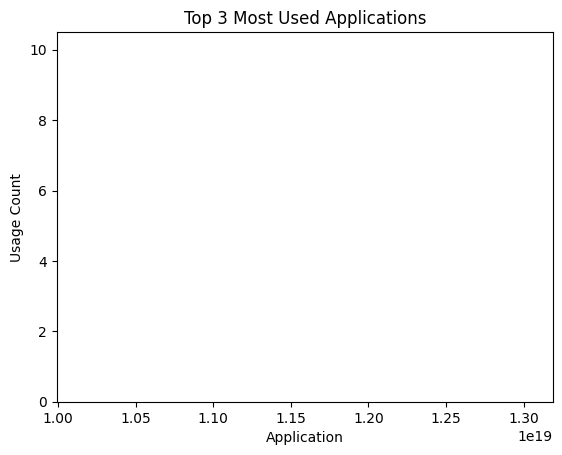

In [9]:
visualize_top_three_apps(top_10_users)

# Task 3 - User Experience Analytics

## Load DataFrame

In [4]:
pd.options.display.float_format = '{:.0f}'.format
cleaned_data = load_cleaned_dataset()

In [5]:
display(cleaned_data)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,4/4/2019 12:01,770,4/25/2019 14:35,662,1823652,208201448079117,33664962239,35521209507511,9.16456699548519E+015,...,15854611,2501332,8198936,9656251,278082303,14344150,171744450,8814393,36749741,308879636
1,13114483482878900224,4/9/2019 13:04,235,4/25/2019 8:15,606,1365104,208201909211140,33681854413,35794009006359,L77566A,...,20247395,19111729,18338413,17227132,608750074,1170709,526904238,15055145,53800391,653384965
2,13114483484080500736,4/9/2019 17:42,1,4/25/2019 11:58,652,1361762,208200314458056,33760627129,35281510359387,D42335A,...,19725661,14699576,17587794,6163408,229584621,395630,410692588,4215763,27883638,279807335
3,13114483485442799616,4/10/2019 0:31,486,4/25/2019 7:36,171,1321509,208201402342131,33750343200,35356610164913,T21824A,...,21388122,15146643,13994646,1097942,799538153,10849722,749039933,12797283,43324218,846028530
4,13114483499480700928,4/12/2019 20:10,565,4/25/2019 10:40,954,1089009,208201401415120,33699795932,35407009745539,D88865A,...,15259380,18962873,17124581,415218,527707248,3529801,550709500,13910322,38542814,569138589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148930,13042425979329300480,4/29/2019 7:28,615,4/30/2019 0:01,407,59587,208201402604057,33668648496,35332510508318,T85721A,...,6550499,18003146,22468983,7149728,784435351,12724751,321383162,14890486,53745392,819016468
148931,7277825670196679680,4/29/2019 7:28,451,4/30/2019 6:02,214,81230,208202201200072,33650688697,35483109451938,D20434A,...,16191667,11763428,17883703,19678161,526609673,9197207,3264510,13487416,57628851,574175259
148932,7349883264234609664,4/29/2019 7:28,483,4/30/2019 10:41,187,97970,208201908153249,33663449963,35660508296467,D10223C,...,13877234,8288284,19350146,21293148,626893062,4735033,712180387,2457758,39135081,666648844
148933,13114483573367300096,4/29/2019 7:28,283,4/30/2019 10:46,810,98249,208201711161187,33621890103,35721209870907,T51102A,...,22660510,1855903,9963942,5065760,553539484,13394316,121100856,11314729,34912224,592786405


## Aggregate per Customer ⦁	Average TCP retransmission, Average RTT, Handset type, Average throughput


In [6]:
agg_data = aggregate_customer_data(cleaned_data)
display(agg_data)

,MSISDN/Number,Avg_TCP_Retrans.,Avg_RTT,Handset,Avg_Throughput
0,33601001722,20809914,46,Huawei P20 Lite Huawei Nova 3E,37
1,33601001754,20809914,30,Apple iPhone 7 (A1778),48
2,33601002511,20809914,110,undefined,48
3,33601007832,1066,69,Apple iPhone 5S (A1457),204
4,33601008617,15079772,57,Apple iPhone Se (A1723),20198
...,...,...,...,...,...
106851,33789996170,215044,42,Huawei Honor 9 Lite,9978
106852,33789997247,20809914,34,Apple iPhone 8 Plus (A1897),68
106853,3197020876596,20809914,110,Quectel Wireless. Quectel Ec25-E,1
106854,337000037000919,20809914,110,Huawei B525S-23A,11


In [7]:
result = compute_top_bottom_frequent_values(agg_data)

# Display the results
for key, value in result.items():
    print(key + ':')
    print(value)
    print()

Top TCP Values:
85785   4289487601
32273   4288060364
58026   4268431996
31942   4254643827
62049   4211189017
70079   4166590984
43629   4131045758
48341   4117753418
64113   3968072422
98211   3785294754
Name: Avg_TCP_Retrans., dtype: float64

Bottom TCP Values:
56622    2
95322    2
71705    4
71778    4
87156    4
87348    4
95213    4
95331    4
95774    4
100616   4
Name: Avg_TCP_Retrans., dtype: float64

Most Frequent TCP Values:
Avg_TCP_Retrans.
20809914    58332
1330          247
2660          138
92            112
10405622      103
38             99
1318           79
3990           72
10404976       68
5320           64
Name: count, dtype: int64

Top RTT Values:
47983    96923
80249    54847
41944    32333
93844    26971
1713     26250
74240    25602
104325   25374
105752   24733
85683    22962
15409    20979
Name: Avg_RTT, dtype: float64

Bottom RTT Values:
28878    0
40873    0
44748    0
66098    0
88903    0
98541    0
39066    2
83396    4
36039    5
106569   5
Name: Avg